In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import keras
from keras.layers import Dense, Activation, Input
from keras.models import Model

In [4]:
ds = pd.read_csv('../train.csv')
data = ds.values

print data.shape

(42000, 785)


In [54]:
# Cell to prepare and standardize data
X_data = data[:, 1:]

#X_std = (X_data - X_data.mean(axis=0))/(X_data.std(axis=0) + 1e-04)
X_std = X_data / 255.0
print X_std.shape, X_std.mean(), X_std.std()

# separate into train and validation
n_train = 5000
n_val = 500
X_train = X_std[:n_train]
X_val = X_std[n_train:(n_train + n_val)]

print X_train.shape, X_val.shape

(42000, 784) 0.131015337921 0.308540155925
(5000, 784) (500, 784)


In [53]:
print X_train.max()

1.0


In [104]:
# Constructing the Encoder and Auto-encoder
embedding_dim = 64

inp = Input(shape=(784,))

fc1 = Dense(embedding_dim)(inp)
ac1 = Activation('tanh')(fc1)
fc2 = Dense(784)(ac1)
ac2 = Activation('sigmoid')(fc2)

autoencoder = Model(input=inp, output=ac2)
# autoencoder.summary()

encoder = Model(input=inp, output=ac1)

In [92]:
for ix in autoencoder.layers:
    print ix

In [105]:
dec_inp = Input(shape=(embedding_dim,))
x = autoencoder.layers[3](dec_inp)
x = autoencoder.layers[4](x)

decoder = Model(input=dec_inp, output=x)
#decoder.summary()

In [118]:
autoencoder.compile(loss='mse', optimizer='adadelta', metrics=['accuracy'])

In [119]:
hist = autoencoder.fit(X_train, X_train,
                      nb_epoch=30,
                      batch_size=100,
                      shuffle=True,
                      validation_data=(X_val, X_val))

Train on 5000 samples, validate on 500 samples
Epoch 1/30
5000/5000 [==============================] - 0s - loss: 0.0100 - acc: 0.0098 - val_loss: 0.0114 - val_acc: 0.0080
Epoch 2/30
5000/5000 [==============================] - 0s - loss: 0.0100 - acc: 0.0100 - val_loss: 0.0114 - val_acc: 0.0080
Epoch 3/30
5000/5000 [==============

In [81]:
#plt.plot(hist.history['acc'])
#plt.plot(hist.history['loss'])

In [120]:
preds = encoder.predict(X_train)
print preds.shape

(5000, 64)


In [121]:
out = decoder.predict(preds)
print out.shape

(5000, 784)


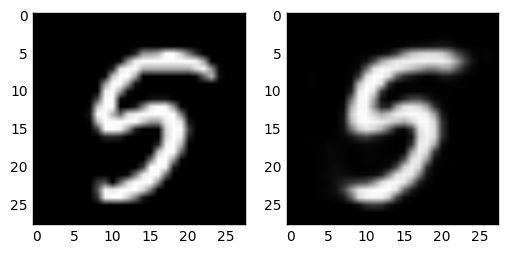

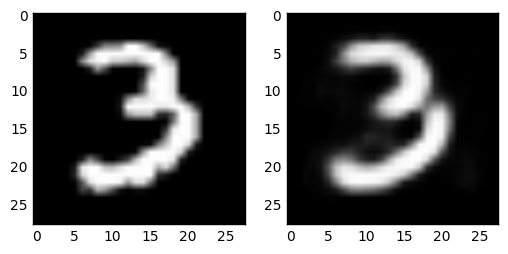

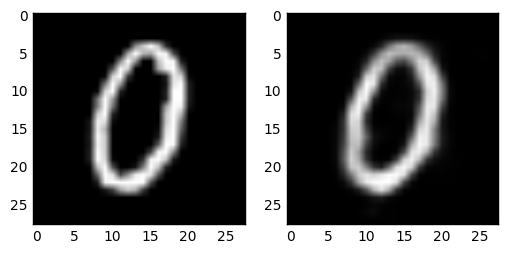

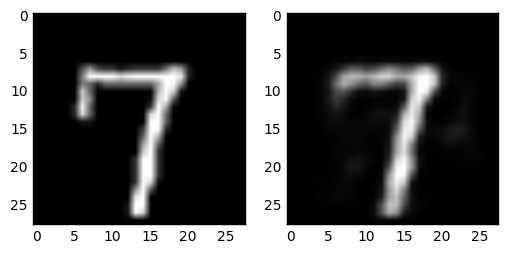

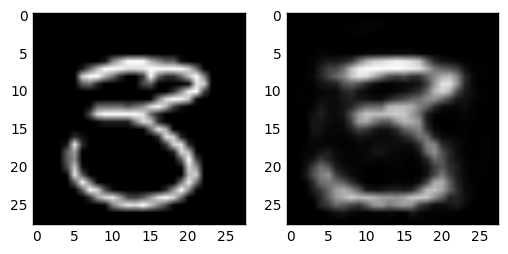

In [122]:
for ix in range(5, 10):
    plt.figure(ix)
    plt.subplot(1, 2, 1)
    plt.imshow(X_train[ix].reshape((28, 28)), cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(out[ix].reshape((28, 28)), cmap='gray')
plt.show()

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

data_2d = pca.fit_transform(X_std[:(n_train + n_val)])
print data_2d.shape

(5500, 2)


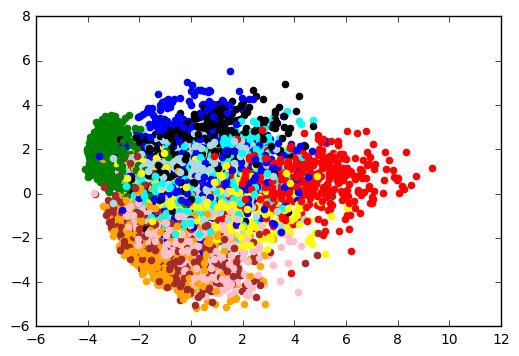

In [70]:
for ix in range(n_train + n_val):
    if data[ix, 0] == 0:
        plt.scatter(data_2d[ix, 0], data_2d[ix, 1], color='red')
    elif data[ix, 0] == 1:
        plt.scatter(data_2d[ix, 0], data_2d[ix, 1], color='green')
    elif data[ix, 0] == 2:
        plt.scatter(data_2d[ix, 0], data_2d[ix, 1], color='blue')
    elif data[ix, 0] == 3:
        plt.scatter(data_2d[ix, 0], data_2d[ix, 1], color='black')
    elif data[ix, 0] == 4:
        plt.scatter(data_2d[ix, 0], data_2d[ix, 1], color='pink')
    elif data[ix, 0] == 5:
        plt.scatter(data_2d[ix, 0], data_2d[ix, 1], color='cyan')
    elif data[ix, 0] == 6:
        plt.scatter(data_2d[ix, 0], data_2d[ix, 1], color='yellow')
    elif data[ix, 0] == 7:
        plt.scatter(data_2d[ix, 0], data_2d[ix, 1], color='orange')
    elif data[ix, 0] == 8:
        plt.scatter(data_2d[ix, 0], data_2d[ix, 1], color='lightblue')
    elif data[ix, 0] == 9:
        plt.scatter(data_2d[ix, 0], data_2d[ix, 1], color='brown')
plt.show()

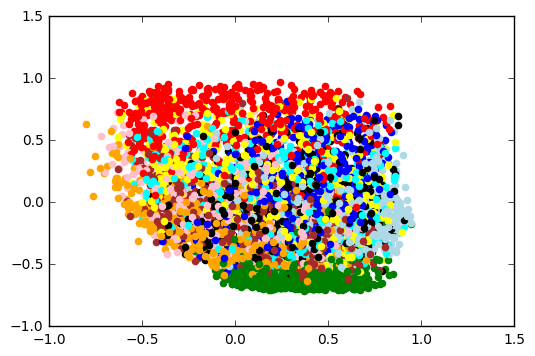

In [83]:
for ix in range(preds.shape[0]):
    if data[ix, 0] == 0:
        plt.scatter(preds[ix, 0], preds[ix, 1], color='red')
    elif data[ix, 0] == 1:
        plt.scatter(preds[ix, 0], preds[ix, 1], color='green')
    elif data[ix, 0] == 2:
        plt.scatter(preds[ix, 0], preds[ix, 1], color='blue')
    elif data[ix, 0] == 3:
        plt.scatter(preds[ix, 0], preds[ix, 1], color='black')
    elif data[ix, 0] == 4:
        plt.scatter(preds[ix, 0], preds[ix, 1], color='pink')
    elif data[ix, 0] == 5:
        plt.scatter(preds[ix, 0], preds[ix, 1], color='cyan')
    elif data[ix, 0] == 6:
        plt.scatter(preds[ix, 0], preds[ix, 1], color='yellow')
    elif data[ix, 0] == 7:
        plt.scatter(preds[ix, 0], preds[ix, 1], color='orange')
    elif data[ix, 0] == 8:
        plt.scatter(preds[ix, 0], preds[ix, 1], color='lightblue')
    elif data[ix, 0] == 9:
        plt.scatter(preds[ix, 0], preds[ix, 1], color='brown')
plt.show()